# Retrieve Sites that Surveyors Found Graupel

**Goal**: Plot all the pit locations and identify which pits had graupel and which didn't

**Approach**: 

1. Find all the pits with graupel in the comments.
2. Find all pits without graupel mentioned in the comments
3. Plot them!

## Process

### Step 1. Use the `LayerData` class to find hand hardness profiles that mention graupel

In [1]:
from snowexsql.data import LayerData, SiteData
from snowexsql.db import get_db
from snowexsql.conversions import query_to_geopandas
import geopandas as gpd
import matplotlib.pyplot as plt 

# Connect to the database
db_name = 'snowex'
engine, session = get_db(db_name)

# Build a query looking at hand hardness profiles, 
q_base = session.query(LayerData).filter(LayerData.type == 'hand_hardness')

# add on to the query by filtering on comments containing graupel (case insensitive)
q = q_base.filter(LayerData.comments.contains('graupel'))

# Send query and convert records to a dataframe with the results
df_graupel = query_to_geopandas(q, engine)

print('Sites with Graupel: {}'.format(', '.join(df_graupel['site_id'])))

Sites with Graupel: 8N38, 6S32, 1N7, 1N3, 1N3, Skyway Open, 2S6, 3S47, 8S41, 2S11, FL2A, County Line Tree, 5S21, 4C30, 1C7, 1S12, 9C28, 4C30, 6C34, 2C12, TLSFL2A, 1C7, 6C34, 7S23, FL1B, 2S6, 3S47, 1S12, 7S23, 6S32, 2S11, 1N5, 1N7, 9C28, TLSFL2A, 1N5, FL1B, FL2A, Skyway Open, 5S21, 8N38, County Line Tree, 2C12, 8S41


### Step 2. Use the same query but request the opposite to get pits without graupel

In [2]:
# Use the exact same query except use ~ to ask for the opposite (pits w/o graupel)
q = q_base.filter(~LayerData.comments.contains('graupel'))

# There are multiple layers for a given site at different depths and dates. So insure we don't grab a site that on a given date had graupel
q = q.filter(~LayerData.date.in_(df_graupel['date']), ~LayerData.site_id.in_(df_graupel['site_id']))

# Send query and convert records to a dataframe with the results
df = query_to_geopandas(q, engine)

### Step 3. Plot pits with graupel in color and without in grey 

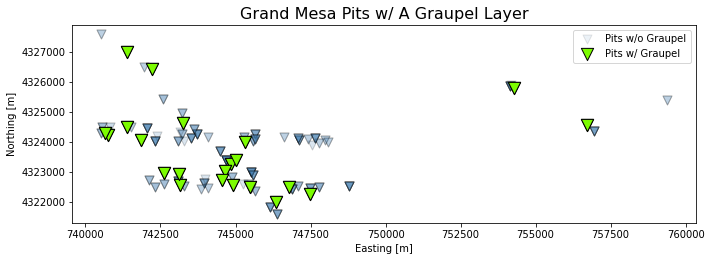

In [3]:
# Close the database session to avoid hanging transactions
session.close()

# Plot the dataframe without graupel as grey and slightly transparent.
ax = df.plot(color='steelblue', alpha=0.1, marker='v', markersize=80, edgecolor='black', label='Pits w/o Graupel', figsize=(10,8))

# Plot the pits with graupel as cyan
ax = df_graupel.plot(color='lawngreen', ax=ax, marker='v', markersize=150, edgecolor='black', label='Pits w/ Graupel')

# Add a legend, x/y labels, and a title, 
ax.legend()
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Grand Mesa Pits w/ A Graupel Layer', FontSize=16)

# Plot labels in plain numbers not scientific notation (default)
ax.ticklabel_format(style='plain', useOffset=False)

# Ask matplotlib to try and avoid overlaying labels on each other
plt.tight_layout()